In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline
from ydata_profiling import ProfileReport

In [2]:
df=pd.read_csv('Hotel Reservations.csv')

In [3]:
df.shape

(36275, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

# Distribution of numerical features
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(5):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

In [6]:
df['Booking_ID'].nunique()

36275

In [7]:
df = df.drop('Booking_ID', axis=1)
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [8]:
# Creating the profiling report
profile = ProfileReport(df, title="Profiling Report", explorative=True)
# Displaying the report in a Jupyter Notebook (optional)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Encoding the identified categorical features
df = pd.get_dummies(df, columns=['type_of_meal_plan'])
df

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       required_car_parking_space room_type_reserved  lead_time  arrival_year  \
0                               0        Room_Type 1        224          2017   
1                               0        Room_Type 1          5          2018   
2                               0        Room_Type 1          1          2018   
3                               0        Room_Type 1        211          2018   
4                               0        Room_Type 1         48          2018   
...                           ...                ...        ...           ...   
36270                           0        Room_Type 4         85          2018   
36271                           0        Room_Type 1        228          2018   
36272                           0        Room_Type 1        148          2018   
36273                           0        Room_Type 1         63          2018   
36274                           0        Room_Type 1        207          2018   

       arrival_month  arrival_date  ... repeated_guest  \
0                 10             2  ...              0   
1                 11             6  ...              0   
2                  2            28  ...              0   
3                  5            20  ...              0   
4                  4            11  ...              0   
...              ...           ...  ...            ...   
36270              8             3  ...              0   
36271             10            17  ...              0   
36272              7             1  ...              0   
36273              4            21  ...              0   
36274             12            30  ...              0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests  booking_status  \
0                   65.00                       0    Not_Canceled   
1                  106.68                       1    Not_Canceled   
2                   60.00                       0        Canceled   
3                  100.00                       0        Canceled   
4                   94.50                       0        Canceled   
...                   ...            

In [10]:
# Frequency encoding of the 'Department' column

# Calculate the frequency of each category in the 'Department' column
frequency = df['room_type_reserved'].value_counts()
# Map the frequencies to the original data
df['room_type_reserved_encoded'] = df['room_type_reserved'].map(frequency)

# Display the first few rows to show the encoded column
df[['room_type_reserved', 'room_type_reserved_encoded']].head(n=10)

room_type_reserved  room_type_reserved_encoded
0        Room_Type 1                       28130
1        Room_Type 1                       28130
2        Room_Type 1                       28130
3        Room_Type 1                       28130
4        Room_Type 1                       28130
5        Room_Type 1                       28130
6        Room_Type 1                       28130
7        Room_Type 4                        6057
8        Room_Type 1                       28130
9        Room_Type 4                        6057

In [11]:

# Calculate the frequency of each category in the 'Department' column
frequency = df['market_segment_type'].value_counts()
# Map the frequencies to the original data
df['market_segment_type_encoded'] = df['market_segment_type'].map(frequency)

# Display the first few rows to show the encoded column
df[['market_segment_type', 'market_segment_type_encoded']].head(n=10)

market_segment_type  market_segment_type_encoded
0             Offline                        10528
1              Online                        23214
2              Online                        23214
3              Online                        23214
4              Online                        23214
5              Online                        23214
6              Online                        23214
7              Online                        23214
8             Offline                        10528
9              Online                        23214

In [12]:
#Binary encoding the label
booking_mapping = {'Canceled': 1, 'Not_Canceled': 0}
df['booking_status_encoded'] = df['booking_status'].map(booking_mapping)
df

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       required_car_parking_space room_type_reserved  lead_time  arrival_year  \
0                               0        Room_Type 1        224          2017   
1                               0        Room_Type 1          5          2018   
2                               0        Room_Type 1          1          2018   
3                               0        Room_Type 1        211          2018   
4                               0        Room_Type 1         48          2018   
...                           ...                ...        ...           ...   
36270                           0        Room_Type 4         85          2018   
36271                           0        Room_Type 1        228          2018   
36272                           0        Room_Type 1        148          2018   
36273                           0        Room_Type 1         63          2018   
36274                           0        Room_Type 1        207          2018   

       arrival_month  arrival_date  ... avg_price_per_room  \
0                 10             2  ...              65.00   
1                 11             6  ...             106.68   
2                  2            28  ...              60.00   
3                  5            20  ...             100.00   
4                  4            11  ...              94.50   
...              ...           ...  ...                ...   
36270              8             3  ...             167.80   
36271             10            17  ...              90.95   
36272              7             1  ...              98.39   
36273              4            21  ...              94.50   
36274             12            30  ...             161.67   

       no_of_special_requests  booking_status  type_of_meal_plan_Meal Plan 1  \
0                           0    Not_Canceled                           True   
1                           1    Not_Canceled                          False   
2                           0        Canceled                           True   
3                           0        Canceled                           True   
4                           0        Canceled                          False   
...                       ...             ...                            ...   
36270                       1    Not_Canceled                           True   
36271                       2        Canceled                           True   
36272                       2    Not_Canceled                           True   
36273                       0        Canceled                          False   
36274                       0    Not_Canceled                           True   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                              False                          False   
1                              False                          False   
2                              False                          False   
3                              False                          False   
4           

In [13]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'room_type_reserved',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_encoded', 'market_segment_type_encoded',
       'booking_status_encoded'],
      dtype='object')

In [17]:
df = df.drop(['room_type_reserved','market_segment_type','booking_status'],axis=1)
df

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                               0        224          2017             10   
1                               0          5          2018             11   
2                               0          1          2018              2   
3                               0        211          2018              5   
4                               0         48          2018              4   
...                           ...        ...           ...            ...   
36270                           0         85          2018              8   
36271                           0        228          2018             10   
36272                           0        148          2018              7   
36273                           0         63          2018              4   
36274                           0        207          2018             12   

       arrival_date  repeated_guest  ...  \
0                 2               0  ...   
1                 6               0  ...   
2                28               0  ...   
3                20               0  ...   
4                11               0  ...   
...             ...             ...  ...   
36270             3               0  ...   
36271            17               0  ...   
36272             1               0  ...   
36273            21               0  ...   
36274            30               0  ...   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
36270                                     0              167.80   
36271                                     0               90.95   
36272                                     0               98.39   
36273                                     0               94.50   
36274                                     0              161.67   

       no_of_special_requests  type_of_meal_plan_Meal Plan 1  \
0                           0                           True   
1                           1                          False   
2                           0                           True   
3                           0                           True   
4                           0                          False   
...                       ...                            ...   
36270                       1                           True   
36271                       2                           True   
36272                       2                           True   
36273                       0                          False   
36274                       0                           True   

       type_of_mea

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

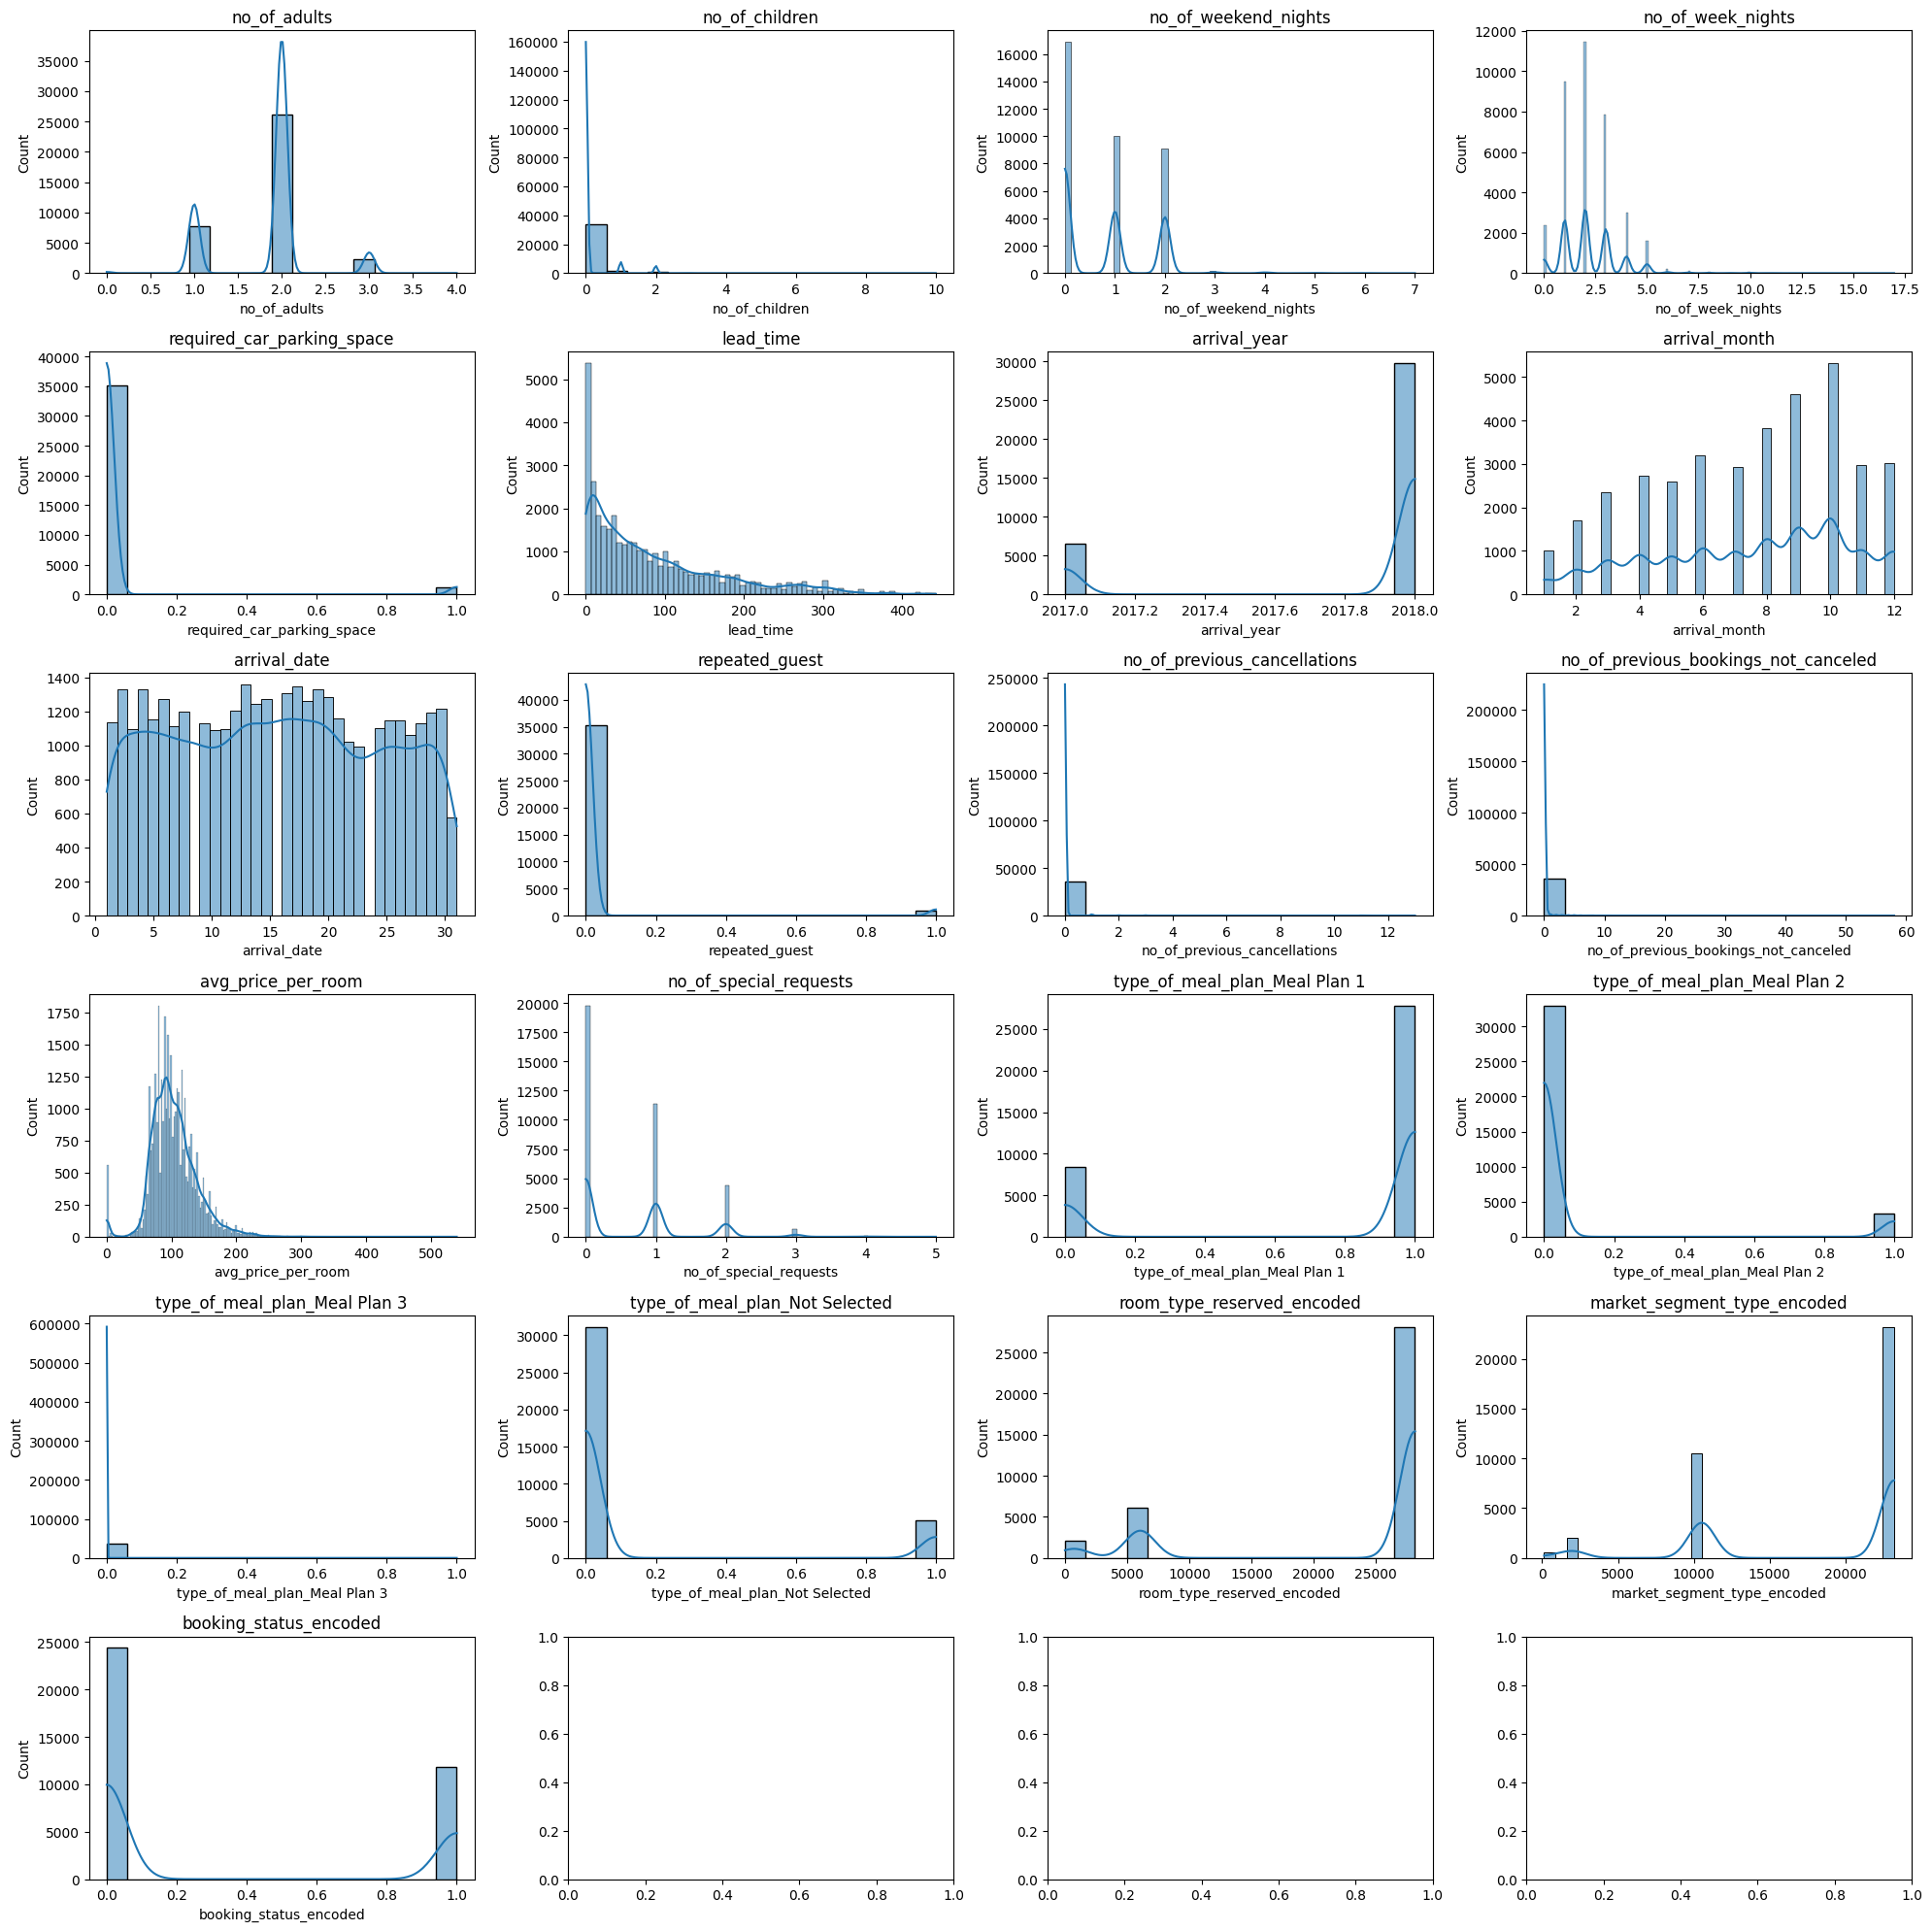

In [21]:
# Distribution of numerical features
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(6):
    for j in range(4):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

Our data needs normalization for KNN

## Using KNN

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Splitting the dataset into features and target variable
X = df.drop('booking_status_encoded', axis=1)
y = df['booking_status_encoded']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(9, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(9, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)

Euclidean Accuracy: 0.8442453480358374
Euclidean Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4839
           1       0.78      0.73      0.76      2416

    accuracy                           0.84      7255
   macro avg       0.83      0.82      0.82      7255
weighted avg       0.84      0.84      0.84      7255

Manhattan Accuracy: 0.8552722260509993
Manhattan Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      4839
           1       0.81      0.74      0.77      2416

    accuracy                           0.86      7255
   macro avg       0.84      0.83      0.83      7255
weighted avg       0.85      0.86      0.85      7255



## Using DT

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [25]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

(0.8719503790489318, 0.875947622329428)

### Hyperparam tuning for knn

Minimum error:- 0.17849758787043418 at K = 1


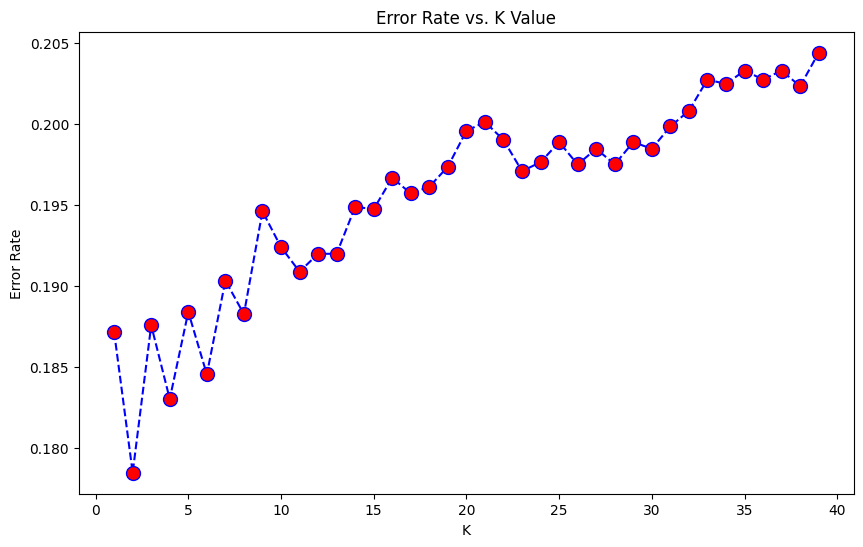

In [27]:
import numpy as np

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

## Our DT model is performing slightly better than knn